In [1]:
#==========Imports==========
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const
import time

import Bell_EBM as ebm

In [5]:
#==========Set Up System==========
planet = ebm.Planet(rad=1.900*const.R_jup.value, mass=1.470*const.M_jup.value,
                    Porb=1.09142030, a=0.02340*const.au.value, inc=83.37, vWind=5e3, nlat = 16)
star = ebm.Star(teff=6300., rad=1.59, mass=1.20)
system = ebm.System(star, planet)

In [4]:
#==========Baseline Creation==========
bUpdates = 10000. #Amount of timesteps in baseline
bOrbits = 1 #Number of orbits in baseline

Teq = system.get_teq()
T0 = np.ones_like(system.planet.map.values)*Teq
t0 = 0.
t1 = t0+system.planet.Porb*bOrbits
dt = system.planet.Porb/bUpdates
baselineMaps, ttc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
baselineLightcurve = system.lightcurve()


In [6]:
#==========Tester Module==========

tStart = time.time()

# ---Variables---
nTests = 10 #Number of intervals ex: 100, 200, 300 updates is 3 intervals
nloop = 5 #Number of times the calculations are to be redone for avg
nStep = 100. #Step number ex: 100, 200, 300 updates is 100 step number

dataArray = np.zeros(shape=(5,nTests))

for j in range(0, nTests):
    cTimeSteps = nStep*(j+1) #Current amount of time steps
    ttcTotal = 0. #Used for avergaing time to compute
    #eMax = 0.
    #eTotal = np.zeros_like(system.planet.map.values)
    lcTotal = np.zeros_like(baselineLightcurve)
    
    #Averaging over nloop tests
    for i in range(0, nloop):
        Teq = system.get_teq()
        T0 = np.ones_like(system.planet.map.values)*Teq
        t0 = 0.
        t1 = t0+system.planet.Porb*1
        dt = system.planet.Porb/cTimeSteps
        testMaps, ttc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
        
        ttcTotal = ttcTotal + float(ttc)
        #eTotal = eTotal + testMaps
        lcTotal = lcTotal + np.absolute(baselineLightcurve-system.lightcurve())
        #if (np.amax(np.absolute(testMaps))>eMax):
            #eMax = np.amax(np.absolute(baselineMaps-testMaps))
            
    ttcAvg = ttcTotal/nloop
    #eTotalavg = eTotal/nloop
    lcAvg = lcTotal/nloop
    
    dataArray[0,j] = ttcAvg #Time to Compute
    dataArray[1,j] = cTimeSteps #Time steps
    #dataArray[2,j] = (np.mean(np.absolute(baselineMaps-eTotalavg))) #Mean error on heat
    #dataArray[3,j] = (np.amax(np.absolute(baselineMaps-eTotalavg))) #Maximum error on heat
    dataArray[4,j] = np.mean(lcAvg) #Mean error on lightcurve
    
    #print('Accuracy lost at ' + str(cTimeSteps) + ' updates:' + str(np.mean(np.absolute(baselineMaps-eTotalavg))))
    #print('Max accuracy lost at ' + str(cTimeSteps) + ' updates:' + str(eMax))
    print('Avergae time to compute at ' + str(cTimeSteps)+ ' updates: ' + str(ttcAvg))
    print('Accuracy lost (LC) at ' + str(cTimeSteps) + ' updates:' + str(dataArray[4,j]))
    print('----------')
    
tEnd = time.time()
tTotal = tEnd - tStart

print('Total computational time: ' + str(tTotal/60) + ' minutes')

Avergae time to compute at 100.0 updates: 0.024434232711791994
Accuracy lost (LC) at 100.0 updates:4.500446009789211e-06
----------
Avergae time to compute at 200.0 updates: 0.0470069408416748
Accuracy lost (LC) at 200.0 updates:4.513984030730451e-06
----------
Avergae time to compute at 300.0 updates: 0.06919441223144532
Accuracy lost (LC) at 300.0 updates:4.518528061867568e-06
----------
Avergae time to compute at 400.0 updates: 0.09045276641845704
Accuracy lost (LC) at 400.0 updates:4.520805553452674e-06
----------
Avergae time to compute at 500.0 updates: 0.11318488121032715
Accuracy lost (LC) at 500.0 updates:4.522185559077291e-06
----------
Avergae time to compute at 600.0 updates: 0.1371779441833496
Accuracy lost (LC) at 600.0 updates:4.523105406690837e-06
----------
Avergae time to compute at 700.0 updates: 0.15607061386108398
Accuracy lost (LC) at 700.0 updates:4.523762362228915e-06
----------
Avergae time to compute at 800.0 updates: 0.17899107933044434
Accuracy lost (LC) at 

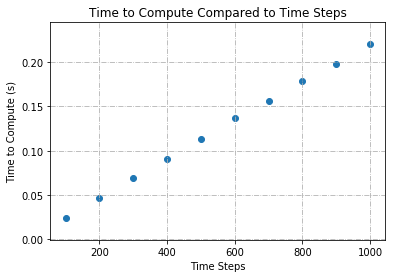

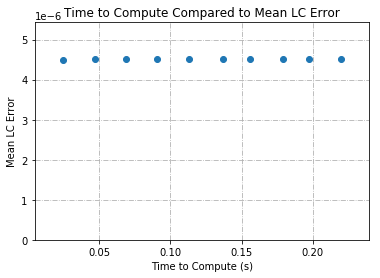

In [7]:
y = dataArray[0,:]
x = dataArray[1,:]
plt.scatter(x, y)
plt.xlabel("Time Steps")
plt.ylabel("Time to Compute (s)")
plt.title('Time to Compute Compared to Time Steps')
plt.grid(True, linestyle='-.')
plt.show()

useLog = False
x = dataArray[0,:]
if useLog == True:
    y = np.log(dataArray[4,:])
    plt.ylabel("Log of Mean LC Error")
else:
    y = dataArray[4,:]
    plt.ylabel("Mean LC Error")
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    lim = (np.amax(dataArray[4,:]))*1.2
    plt.ylim(bottom=0, top = lim) 
    
plt.scatter(x, y)
plt.xlabel("Time to Compute (s)")
plt.title('Time to Compute Compared to Mean LC Error')
plt.grid(True, linestyle='-.')
plt.show()

<h1><center>Lightcurves at Low Time Resolution</center></h1>

In [17]:
#==========Imports==========
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const
import time

import Bell_EBM as ebm

In [18]:
#==========Set Up System==========
planet = ebm.Planet(rad=1.900*const.R_jup.value, mass=1.470*const.M_jup.value,
                    Porb=1.09142030, a=0.02340*const.au.value, inc=83.37, vWind=5e3, nlat = 16)
star = ebm.Star(teff=6300., rad=1.59, mass=1.20)
system = ebm.System(star, planet)

In [22]:
#==========HighRes (Baseline) Creation==========
baseUpdates = 50000. #Amount of timesteps in baseline
baseOrbits = 1 #Amount of orbits in baseline

Teq = system.get_teq()
T0 = np.ones_like(system.planet.map.values)*Teq
t0 = 0.
t1 = t0+system.planet.Porb*baseOrbits
dt = system.planet.Porb/baseUpdates
baselineMaps, basettc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
baselineLightcurve = system.lightcurve()


In [23]:
#==========Tester Module==========

nOrbits = 1 #Number of orbits
#T0 = 0.3*Teq*np.cos(system.planet.map.lonGrid)+0.5*Teq
Teq = system.get_teq()
T0 = np.ones_like(system.planet.map.values)*Teq
t0 = 0.
t1 = t0+system.planet.Porb*nOrbits

#==========LowResAlpha Creation==========
aUpdates = 20000. #Amount of timesteps in baseline

dt = system.planet.Porb/aUpdates
alphaMaps, alphattc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
alphaLightcurve = system.lightcurve()

#==========LowResBeta Creation==========
bUpdates = 10000. #Amount of timesteps in baseline

dt = system.planet.Porb/bUpdates
betaMaps, betattc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
betaLightcurve = system.lightcurve()

#==========LowResCharlie Creation==========
cUpdates = 5000. #Amount of timesteps in baseline

dt = system.planet.Porb/cUpdates
charlieMaps, charliettc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
charlieLightcurve = system.lightcurve()

#==========LowResDelta Creation==========
dUpdates = 2500. #Amount of timesteps in baseline

dt = system.planet.Porb/dUpdates
deltaMaps, deltattc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
deltaLightcurve = system.lightcurve()

#==========LowResEcho Creation==========
eUpdates = 1000. #Amount of timesteps in baseline

dt = system.planet.Porb/eUpdates
echoMaps, echottc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
echoLightcurve = system.lightcurve()

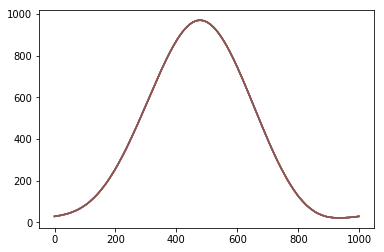

In [25]:
plt.plot((baselineLightcurve)*1e6)
plt.plot((alphaLightcurve)*1e6)
plt.plot((betaLightcurve)*1e6)
plt.plot((charlieLightcurve)*1e6)
plt.plot((deltaLightcurve)*1e6)
plt.plot((echoLightcurve)*1e6)

Alpha ttc: 4405.407905578613 ms
Beta ttc: 2435.30535697937 ms
Charlie ttc: 1108.577013015747 ms
Delta ttc: 568.0687427520752 ms
Echo ttc: 225.3708839416504 ms


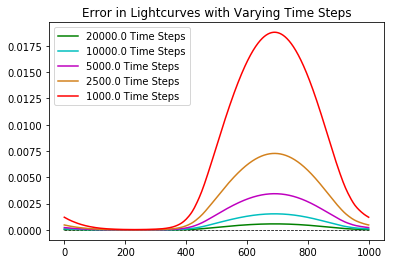

In [26]:
#baselineLightcurve, testLightcurve, baselineLightcurve - testLightcurve
plt.plot((baselineLightcurve-baselineLightcurve)*1e6, 'k', linestyle = "--", lw=0.75)
plt.plot((baselineLightcurve-alphaLightcurve)*1e6, 'g', label = (str(aUpdates) + ' Time Steps'))
plt.plot((baselineLightcurve-betaLightcurve)*1e6, "c", label = (str(bUpdates) + ' Time Steps'))
plt.plot((baselineLightcurve-charlieLightcurve)*1e6, 'm', label = (str(cUpdates) + ' Time Steps'))
plt.plot((baselineLightcurve-deltaLightcurve)*1e6, color='#d3811d', label = (str(dUpdates) + ' Time Steps'))
plt.plot((baselineLightcurve-echoLightcurve)*1e6, 'r', label = (str(eUpdates) + ' Time Steps'))
plt.title('Error in Lightcurves with Varying Time Steps')
plt.legend()
print('Alpha ttc: ' + str(alphattc*1e3) + ' ms')
print('Beta ttc: ' + str(betattc*1e3) + ' ms')
print('Charlie ttc: ' + str(charliettc*1e3) + ' ms')
print('Delta ttc: ' + str(deltattc*1e3) + ' ms')
print('Echo ttc: ' + str(echottc*1e3) + ' ms')

Error: Your time step must be sufficiently small so that gas travels less that 0.5 pixels.
Use a time step of 0.03086 or less


Alpha ttc: 16.788005828857422 ms
Beta ttc: 12.228965759277344 ms
Charlie ttc: 10.748147964477539 ms
Deta ttc: 10.499000549316406 ms
Echo ttc: 10.055303573608398 ms


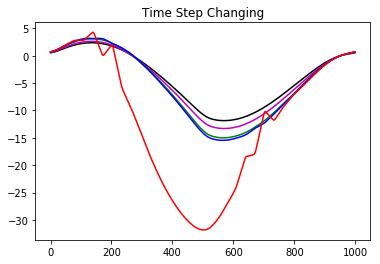